<a href="https://colab.research.google.com/github/WONYOUNG-SONG/DeepLearningTensorFlow2/blob/main/Lab11_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab11: MNIST with CNN**

# **What is CNN?**

**Convolutional Neural Network consists of multiple layers like the input layer, Convolutional layer, Pooling layer, and fully connected layers.**


<div>
  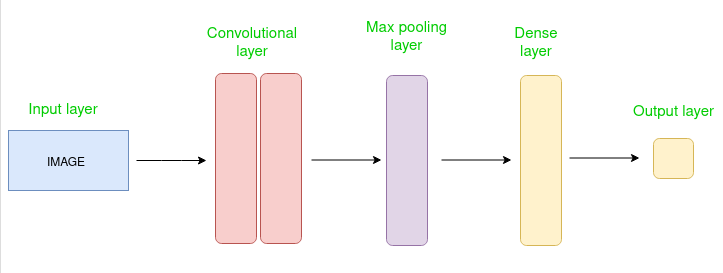
</div>

reference: https://www.geeksforgeeks.org/introduction-convolution-neural-network/

In [ ]:
# Lab 11 MNIST and Convolutional Neural Network
import numpy as np
import tensorflow as tf
import random

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test / 255
x_train = x_train / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# one hot encode y data
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# hyper parameters
learning_rate = 0.001
training_epochs = 12
batch_size = 128

tf.model = tf.keras.Sequential()
# L1
tf.model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L2
tf.model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L3 fully connected
tf.model.add(tf.keras.layers.Flatten())
tf.model.add(tf.keras.layers.Dense(units=10, kernel_initializer='glorot_normal', activation='softmax'))

tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
tf.model.summary()

tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           8,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,810 (50.04 KB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 68ms/step - accuracy: 0.7842 - loss: 0.7933
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.9714 - loss: 0.0951
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9795 - loss: 0.0693
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.9818 - loss: 0.0585
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9846 - loss: 0.0493
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9865 - loss: 0.0432
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9891 - loss: 0.0370
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.9879 - loss: 0.0371
Epoch 9/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.9904 - loss: 0.0307
Epoch 10/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.9907 - loss: 0.0308
Epoch 11/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.9921 - loss: 0.0280
Epoch 12/12
469/469 ━━━━━━━━━━

accuracy 98% loss 3%